In [68]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [72]:
image_directory = 'train/shapes_train2018/'
annotation_file = 'train/instances_shape_train2018.json'

In [73]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [79]:
categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
beet

Custom COCO supercategories: 
plant


In [80]:
category_ids = example_coco.getCatIds(catNms=['beet'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[0])[0]

In [81]:
image_data

{'id': 1,
 'file_name': '2412.jpg',
 'width': 500,
 'height': 500,
 'date_captured': '2020-03-22 22:02:56.593054',
 'license': 1,
 'coco_url': '',
 'flickr_url': ''}

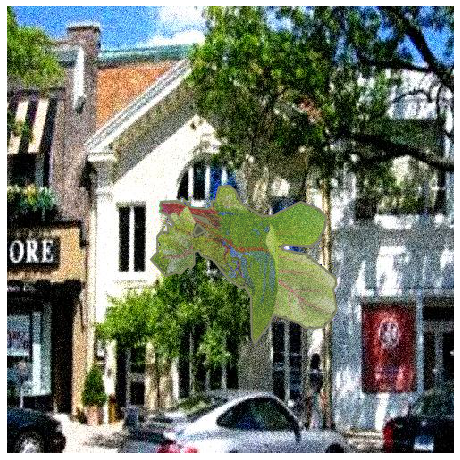

In [82]:
# load and display instance annotations
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)